Import Packages

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Load and Prepare Data from Kaggle: https://www.kaggle.com/code/esparko/getting-started-tweet2map-dataset/input

In [2]:
data = pd.read_csv("data_mmda_traffic_spatial.csv")
data.head()
data = data[(data['Latitude'] != 0.0) & (data['Longitude'] != 0.0)]

Pre-process the data and set the feature variables to be used

In [3]:
features = data[["Latitude", "Longitude"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Determine the appropriate number of clusters

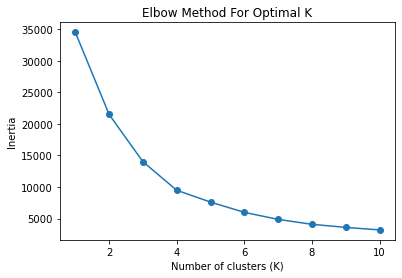

In [4]:
inertia = []

for K in range(1, 11):
    kmeans = KMeans(n_clusters=K, random_state=0)
    clusters = kmeans.fit_predict(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'o-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

Perform clustering using the K-means algorithm

In [5]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

Label the clusters

In [6]:
data['cluster'] = kmeans.labels_

Show the clusters

In [7]:
for cluster_id in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    print(f'Cluster {cluster_id}:')
    print(cluster_data[['Latitude', 'Longitude']])
    print('------------------------------------')

Cluster 0:
        Latitude   Longitude
0      14.586343  121.061481
1      14.589432  121.057243
2      14.559818  121.040737
3      14.589432  121.057243
4      14.601846  121.046754
...          ...         ...
17304  14.586681  121.056314
17305  14.582431  121.054467
17308  14.559818  121.040737
17309  14.616404  121.052548
17310  14.593548  121.058028

[8343 rows x 2 columns]
------------------------------------
Cluster 1:
        Latitude   Longitude
9      14.619717  121.050978
17     14.628035  121.047229
18     14.628035  121.047229
25     14.653739  121.038708
27     14.639754  121.030335
...          ...         ...
17282  14.641357  121.032867
17292  14.657174  120.986269
17298  14.657294  120.993262
17303  14.641388  121.032974
17306  14.639692  121.040453

[3727 rows x 2 columns]
------------------------------------
Cluster 2:
        Latitude   Longitude
14     14.537348  120.993593
21     14.528998  120.993456
23     14.537979  121.004863
24     14.609729  120.992720
29